In [32]:
from master import *
from subproblem import *
from master_pyo import MP_pyo
from configs_chem_process import *
import time
from tqdm import tqdm
import time

In [33]:
u_set = [u_set_init]

In [3]:
d_set

[array([ 130.,  112., -110.,  -88.,   35.,   49.,  -25.,  -41.,  130.,
         112., -110.,  -88.,   35.,   49.,  -25.,  -41.,  130.,  112.,
        -110.,  -88.,   35.,   49.,  -25.,  -41.,  130.,  112., -110.,
         -88.,   35.,   49.,  -25.,  -41.,  130.,  112., -110.,  -88.,
          35.,   49.,  -25.,  -41.]),
 array([ 76.,  68., -64., -56.,  40.,  37., -30., -27.,  76.,  68., -64.,
        -56.,  40.,  37., -30., -27.,  76.,  68., -64., -56.,  40.,  37.,
        -30., -27.,  76.,  68., -64., -56.,  40.,  37., -30., -27.,  76.,
         68., -64., -56.,  40.,  37., -30., -27.]),
 array([ 65.,  35., -55., -25.,  23.,  14., -17.,  -6.,  65.,  35., -55.,
        -25.,  23.,  14., -17.,  -6.,  65.,  35., -55., -25.,  23.,  14.,
        -17.,  -6.,  65.,  35., -55., -25.,  23.,  14., -17.,  -6.,  65.,
         35., -55., -25.,  23.,  14., -17.,  -6.]),
 array([ 52.,  52., -48., -48.,  27.,  27., -23., -23.,  52.,  52., -48.,
        -48.,  27.,  27., -23., -23.,  52.,  52., -48., 

In [4]:
# ###################################
# ### optimization of master problem using pyomo
# ### tips: nv的大小会影响mp求出来的lower bound的最小值; subproblem里的big M的值会影响upper bound的最大值。
# ###################################
# obj_option = "DRO"
# ccg_str = time.time()
# for k_iter in range(num_iter):
    
#     mp_x, mp_mu, mp_nv, mp_obj, mp_term_cond = MP_pyo(u_set, k_iter)  #### solve master problem
    
#     print("master problem termination condition: ", mp_term_cond)
#     print("solution of MP is: ", mp_x)
    
# #    y = np.array([pyo.value(mp_subopt.y[k]) for k in range(1,len(mp_subopt.y)+1)]) #####  添加循环的上界
    
# #    eta, mp_subopt_2 = MP_subopt2(y)
    
#     LB = mp_obj
    
#     LB_list = np.append(LB_list, LB)
    
#     sp_obj_vec = np.array([])
#     u_set_iter = []
#     sp_termination_status = []

#     print("------------------------------------------------------------------")
#     for k in ind_k:
#         D, d = D_set[k], d_set[k]
#         sp_obj, sp_u, sp_vio, sp = SP_gp(mp_x, D, d)  ## solve k different subproblems 

#         print("SP termination condition is: ", sp.status)
#         u_k = np.array(sp_u) #np.array([sp.u.x for i in ind_u])
# #        print(results.solver.termination_condition)
# #        u_k = np.array([pyo.value(sp.u[i]) for i in ind_u])
#         u_set_iter.append(u_k)
#         sp_termination_status.append(sp.status == 2)
# #        sp_termination_status.append(results.solver.termination_condition == TerminationCondition.infeasibleOrUnbounded)
        
#         #if results.solver.termination_condition != TerminationCondition.infeasibleOrUnbounded:
#         if sp.status == 2:                   
# #            sp_obj = pyo.value(sp_obj)             
#             sp_obj_vec = np.append(sp_obj_vec, sp_obj)
            
#     u_set.append(u_set_iter)
#     print("subproblem solution: ", sp_obj_vec)
#     print("subproblem termination condition: ", sp_termination_status)
# #    print(results.solver.termination_condition)
#     print("master problem nv is: ", mp_nv)
#     print("master problem mu is: ", mp_mu)

#     print("subproblem violation is: ", sp_vio)
# #    print(pyo.value(sp.vio))
#     sub_inter = np.exp( (sp_obj_vec - mp_mu)/mp_nv -1 )

#     if obj_option == "DRO":
#         UB_candidate = c@mp_x + mp_mu + rho*mp_nv + mp_nv*( np.dot(pbar, sub_inter) ) #np.dot(c, x)
#     elif obj_option == "RO":
#         UB_candidate = c@mp_x + np.dot(pbar, sp_obj_vec)
#     else:
#         raise("objective option is not correctly provided")

#     UB = min(UB, UB_candidate)
#     UB_list = np.append(UB_list,UB)
#     print("Lower bound is: ", LB)
#     print("Upper bound is: ", UB)

            
#     if np.abs(UB - LB) <= epsilon:
#         print("first stage decision variables: ", mp_x)
#         # print("worst case scenario is: ", u_set)
#         break

# computation_time_ccg = time.time() - ccg_str
# print("computation time of ccg is: ", computation_time_ccg)

# plt.plot(UB_list)
# plt.plot(LB_list)

In [5]:
###################

obj_option = "DRO"

def ccg_opt(rho, obj_option = obj_option, reform = True):

    UB_list = np.array([])
    LB_list = np.array([])
    
    epsilon = 0.03
    num_iter = 5
    UB = 1e8
    LB = -1e8
    rho = rho
    ccg_str = time.time()
        
    for k_iter in range(num_iter):
        if obj_option == "DRO":
            mp_x, mp_mu, mp_nv, mp_obj, mp_term_cond, bTy_max = MP_gp_DRO(u_set, k_iter, rho = rho, reform = reform, return_by = True)  #### solve master problem
        elif obj_option == "RO":
            mp_x, mp_mu, mp_nv, mp_obj, mp_term_cond, bTy_max = MP_gp_RO(u_set, k_iter, return_by = True)  #### solve master problem
        elif obj_option == "SRO":
            mp_x, mp_mu, mp_nv, mp_obj, mp_term_cond, bTy_max = MP_gp_SRO(u_set, k_iter, return_by = True)
            
        print("##################################################################")
        print("master problem termination condition: ", mp_term_cond)
            
        LB = mp_obj
        
        LB_list = np.append(LB_list, LB)
        
        sp_obj_vec = np.array([])
        u_set_iter = []
        sp_termination_status = []
        print("------------------------------------------------------------------")
        for k in ind_k:
            D, d = D_set[k], d_set[k]
            sp_obj, sp_u, sp_vio, sp = SP_gp_sd(mp_x, D, d)  ## solve k different subproblems using strong duality or KKT
    
            print("SP termination condition is: ", sp.status)
            
            u_k = np.array(sp_u) 
            u_set_iter.append(u_k)
            sp_termination_status.append(sp.status == 2)
            
            #if sp.status == 2:                             
            sp_obj_vec = np.append(sp_obj_vec, sp_obj)
                
        u_set.append(u_set_iter)
        
        print("subproblem solution: ", sp_obj_vec)
        print("subproblem termination condition: ", sp_termination_status)
    
        print("master problem nv is: ", mp_nv)
        print("master problem mu is: ", mp_mu)
    
        print("subproblem violation is: ", sp_vio)

        
    
        if obj_option == "DRO":
            sub_inter = np.array([np.exp( (sp_obj_vec[k] - mp_mu)/mp_nv -1 ) for k in ind_k])
            UB_candidate = c@mp_x + mp_mu + rho*mp_nv + mp_nv*( np.dot(pbar, sub_inter) ) #np.dot(c, x)
        elif obj_option == "RO":
            UB_candidate = c@mp_x + np.max(sp_obj_vec)
        elif obj_option == "SRO":
            UB_candidate = c@mp_x + np.dot(pbar,sp_obj_vec)
        else:
            raise("objective option is not correctly provided")
    
        UB = min(UB, UB_candidate)
        UB_list = np.append(UB_list,UB)
        print("Lower bound is: ", LB)
        print("Upper bound is: ", UB)
    
                
        if np.abs((UB - LB)/LB) <= epsilon:
            print("first stage decision variables: ", mp_x)
            # print("worst case scenario is: ", u_set)
            break
    
    computation_time_ccg = time.time() - ccg_str
    print("computation time of ccg is: ", computation_time_ccg)

    return mp_x, sp_obj_vec

#mp_x, bTy_max = ccg_opt()

In [6]:
## generate proper distribution samples ###
# pbar_var = 0.5*np.array([np.sqrt(rho/len(pbar)*pbar[k]) for k in range(len(pbar))])

# N = 5000
# p_sample = np.zeros((N,len(pbar)))
# for t in range(len(pbar)-1):
#     p_sample[:,t] = np.random.normal(pbar[t], pbar_var[t], size = N)
# p_sample[:,len(pbar)-1] = 1 - np.sum(p_sample,axis = 1)

def kl_diverg(p,q):
    return np.sum(p*np.log(p/q), where = (p != 0))
    #return sum(p[t]*np.log(p[t]/q[t]) if p[t] != 0 for t in range(len(p)))

# ### compute the number of samples satisfying the KL requirement
# index_list = []
# for i in range(N):
#     if kl_diverg(p_sample[i], pbar) > rho:
#         index_list.append(False)
#     else:
#         index_list.append(True)
# print("the percentage of p samples satisfying the KL divergence: ", sum(index_list)/N)

## compute the objective value with all p samples
# def compute_obj_ary():
#     obj_ary = np.array([])
#     for i in range(N):
#         obj_ary = np.append(obj_ary, c@mp_x + np.dot(p_sample[i], by_max))

In [ ]:
# p_sample = np.zeros((N,len(pbar)))
# for t in range(len(pbar)-1):
#     p_sample[:,t] = np.random.normal(pbar[t], pbar_var[t], size = N)
# p_sample[:,len(pbar)-1] = 1 - np.sum(p_sample, axis = 1)

# pbar_var = 0.5*np.array([np.sqrt(rho/len(pbar)*pbar[k]) for k in range(len(pbar))])

# pbar_var = np.minimum(pbar_var, 0.5*pbar)

# # N = 10000
# p_sample = np.zeros((N,len(pbar)))
# for t in range(len(pbar)-1):
#     p_sample[:,t] = np.random.normal(pbar[t], pbar_var[t], size = N)
#     p_sample[:,t] = np.maximum(p_sample[:,t], np.zeros(N))
# p_sample[:,len(pbar)-1] = 1 - np.sum(p_sample, axis = 1)

# pp = np.min(p_sample, axis = 1)
# p_sample[pp >= 0]

In [ ]:
# ### compute the number of samples satisfying the KL divergence criterion
# pp = np.min(p_sample, axis = 1)
# sum(pp >= 0)

In [36]:
np.random.seed(12345)
#rho_list = np.append(np.linspace(0,2,5, endpoint = False), np.linspace(2,10,5))
rho_list = np.linspace(0,5,10)

def kl_diverg(p,q):
    return np.sum(p*np.log(p/q), where = (p != 0))
    #return sum(p[t]*np.log(p[t]/q[t]) if p[t] != 0 for t in range(len(p)))


### generate proper distribution samples ###
N = 5000
p_sample_list = []
for rho in rho_list:
    pbar_var = 0.5*np.array([np.sqrt(rho/len(pbar)*pbar[k]) for k in range(len(pbar))])
    #pbar_var = np.minimum(pbar_var, 0.5*pbar)
    
    p_sample = np.zeros((N,len(pbar)))
    for t in range(len(pbar)-1):
        p_sample[:,t] = np.random.normal(pbar[t], pbar_var[t], size = N)
        p_sample[:,t] = np.maximum(p_sample[:,t], np.zeros(N))
    p_sample[:,-1] = 1 - np.sum(p_sample, axis = 1)
    
    pp = np.min(p_sample, axis = 1)
    p_sample = p_sample[pp >= 0]
    
    index_list = []
    for i in range(len(p_sample)):
        if kl_diverg(p_sample[i], pbar) > rho:
            index_list.append(False)
        else:
            index_list.append(True)
    print("the percentage of p samples satisfying the KL divergence: ", sum(index_list)/N)
    p_sample = p_sample[index_list]
    p_sample_list.append(p_sample)


the percentage of p samples satisfying the KL divergence:  1.0
the percentage of p samples satisfying the KL divergence:  0.8854
the percentage of p samples satisfying the KL divergence:  0.798


C:\Users\yli48\AppData\Local\Temp\ipykernel_39032\1206999057.py:6: RuntimeWarning: divide by zero encountered in log
  return np.sum(p*np.log(p/q), where = (p != 0))
C:\Users\yli48\AppData\Local\Temp\ipykernel_39032\1206999057.py:6: RuntimeWarning: invalid value encountered in multiply
  return np.sum(p*np.log(p/q), where = (p != 0))


the percentage of p samples satisfying the KL divergence:  0.745
the percentage of p samples satisfying the KL divergence:  0.7112
the percentage of p samples satisfying the KL divergence:  0.6952
the percentage of p samples satisfying the KL divergence:  0.6616
the percentage of p samples satisfying the KL divergence:  0.6566
the percentage of p samples satisfying the KL divergence:  0.6238
the percentage of p samples satisfying the KL divergence:  0.6248


In [37]:
np.max(p_sample_list[0])

0.5

In [38]:
obj_mean_list = np.array([])
obj_min_list = np.array([])
obj_max_list = np.array([])
mp_x = np.array([])
bTy_max = np.array([])

reform = True

obj_option = "DRO"
rho_list = [0]

for k in tqdm(range(len(rho_list))):
    rho = rho_list[k]
    if (k == 0 and obj_option == "RO") or (rho == 0 and obj_option == "SRO"):
        mp_x, bTy_max = ccg_opt(rho, obj_option = obj_option)
    elif obj_option != "RO" and obj_option != "SRO":
        mp_x, bTy_max = ccg_opt(rho, obj_option = obj_option, reform = reform)
        
    p_sample = p_sample_list[k]
    
    obj_ary = np.array([])
    for i in range(len(p_sample)):
        obj_ary = np.append(obj_ary, c@mp_x + np.dot(p_sample[i], bTy_max))

    obj_mean_list = np.append(obj_mean_list, np.mean(obj_ary))
    obj_min_list = np.append(obj_min_list, np.min(obj_ary))
    obj_max_list = np.append(obj_max_list, np.max(obj_ary))

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
master problem termination condition:  2
##################################################################
master problem termination condition:  True
------------------------------------------------------------------
SP termination condition is:  2
SP termination condition is:  2
SP termination condition is:  2
SP termination condition is:  2
subproblem solution:  [-478.94834592 -519.74939015 -220.49773136 -433.43257623]
subproblem termination condition:  [True, True, True, True]
master problem nv is:  115.28977487091773
master problem mu is:  -530.4164369121554
subproblem violation is:  0
Lower bound is:  -415.4574122898778
Upper bound is:  -346.28049907633107
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
master problem termination condition:  2
##################################################################
master problem termination condition:  True
--------------------

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [06:54<00:00, 414.10s/it]

SP termination condition is:  2
subproblem solution:  [-479.03722596 -519.82356715 -220.43846833 -433.62822287]
subproblem termination condition:  [True, True, True, True]
master problem nv is:  213.4439130018012
master problem mu is:  -666.8825088377926
subproblem violation is:  0
Lower bound is:  -372.2809352172793
Upper bound is:  -380.65942152619846
first stage decision variables:  [ 1.          0.          1.          1.          0.          1.
  1.          1.          8.23182295  0.          0.72666667  8.23489612
  0.         10.          9.40067947 10.          1.          0.
  1.          1.          0.          1.          1.          1.
  6.17359472  0.          5.13333333 10.          0.          0.63501493
 10.         10.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.      

In [10]:
p_sample_list[3].shape

(3725, 4)

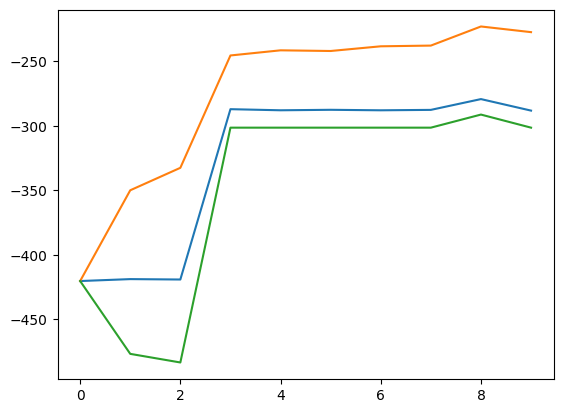

In [18]:
plt.plot(obj_mean_list)
plt.plot(obj_max_list)
plt.plot(obj_min_list)

# np.savez(f"{obj_option}_data_{reform}.npz", obj_mean_list = obj_mean_list, obj_max_list = obj_max_list, obj_min_list = obj_min_list)

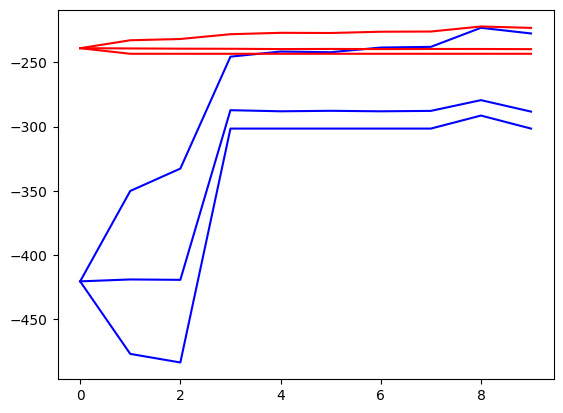

In [19]:
dro_data = np.load("dro_data_true.npz")
dro_obj_mean_list = dro_data["obj_mean_list"]
dro_obj_min_list = dro_data["obj_min_list"]
dro_obj_max_list = dro_data["obj_max_list"]
plt.plot(dro_obj_mean_list, "b")
plt.plot(dro_obj_max_list, "b")
plt.plot(dro_obj_min_list, "b")


ro_data = np.load("ro_data_true.npz")
ro_obj_mean_list = ro_data["obj_mean_list"]
ro_obj_min_list = ro_data["obj_min_list"]
ro_obj_max_list = ro_data["obj_max_list"]
plt.plot(ro_obj_mean_list, "r")
plt.plot(ro_obj_max_list, "r")
plt.plot(ro_obj_min_list, "r")

# sro_data = np.load("sro_data.npz")
# sro_obj_mean_list = sro_data["obj_mean_list"]
# sro_obj_min_list = sro_data["obj_min_list"]
# sro_obj_max_list = sro_data["obj_max_list"]
# plt.plot(sro_obj_mean_list, "g")
# plt.plot(sro_obj_max_list, "g")
# plt.plot(sro_obj_min_list, "g")

# plt.plot(obj_mean_list, "r")
# plt.plot(obj_max_list, "r")
# plt.plot(obj_min_list, "r")


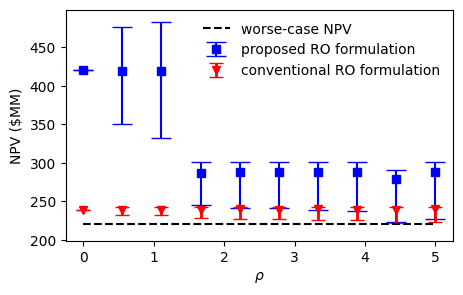

In [31]:
plt.figure(figsize = (5,3))
dro_mean_list = -dro_obj_mean_list
dro_min_list = -dro_obj_max_list
dro_max_list = -dro_obj_min_list

ro_mean_list = -ro_obj_mean_list
ro_min_list = -ro_obj_max_list
ro_max_list = -ro_obj_min_list

dro_err = np.append(dro_mean_list - dro_min_list, dro_max_list - dro_mean_list).reshape(2,-1)
#sro_err = np.concatenate((sro_mean_list - ro_min_list, ro_max_list - sro_mean_list)).reshape(2,-1)
ro_err = np.concatenate((ro_mean_list - ro_min_list, ro_max_list - ro_mean_list)).reshape(2,-1)

plt.errorbar(rho_list, dro_mean_list, yerr=dro_err, elinewidth = 1.5, capsize = 7, fmt='bs', ecolor='blue', label='proposed RO formulation')
plt.errorbar(rho_list, ro_mean_list, yerr=ro_err, elinewidth = 2, capsize = 5, fmt='rv', ecolor='red', label='conventional RO formulation' )
plt.plot(rho_list, 221*np.ones(len(rho_list)), "k--", label = "worse-case NPV")

plt.ylim(199,499)
#plt.axis([-0.1,2.1, 200,530])
plt.xlabel(r'$\rho$')
plt.ylabel('NPV (\$MM)')
plt.legend(ncol = 1, frameon = False)
plt.savefig("rho_npv.pdf", bbox_inches = "tight")

In [30]:
len(rho_list)

10

In [ ]:
##############################
####  optimization using the pyomo for subproblems
###############################

ccg_str = time.time()

UB_list = np.array([])
LB_list = np.array([])

epsilon = 50
num_iter = 5
UB = 1e6
LB = -1e5
for k_iter in range(num_iter):
    
    mp_x, mp_mu, mp_nv, mp_obj, mp_term_cond = MP_gp_DRO(u_set, k_iter)  #### solve master problem
    
    print("master problem termination condition: ", mp_term_cond)
    
    LB = mp_obj
    
    LB_list = np.append(LB_list, LB)
    
    x = mp_x
    sp_obj_vec = np.array([])
    u_set_iter = []
    sp_termination_status = []
    
    for k in ind_k:

        print("iteration of subproblem is: ", k)
        
        D, d = D_set[k], d_set[k]
        
        sp, results = SP(x, D, d)  ## solve k different subproblems 
#        print("termination status of SP is: ", sp.status)
        u_k = np.array([pyo.value(sp.u[i]) for i in ind_u])
        u_set_iter.append(u_k)
        
        sp_termination_status.append(results.solver.termination_condition == TerminationCondition.optimal)
        
        if results.solver.termination_condition != TerminationCondition.infeasible:
                           
            sp_obj = pyo.value(sp.Obj)             
            sp_obj_vec = np.append(sp_obj_vec, sp_obj)
            
    u_set.append(u_set_iter)
    print("subproblem solution: ", sp_obj_vec)
    print("subproblem termination condition: ", sp_termination_status)
#    print(results.solver.termination_condition)
    print("master problem nv is: ", mp_nv)
    print("master problem mu is: ", mp_mu)

    print(pyo.value(sp.vio))
    UB_candidate = np.dot(c, x) + mp_mu + rho*mp_nv + mp_nv*( np.dot(pbar, 
                    np.exp( (sp_obj_vec - mp_mu)/mp_nv -1 )) )

    UB = min(UB, UB_candidate)
    UB_list = np.append(UB_list,UB)
    print("Lower bound is: ", LB)
    print("Upper bound is: ", UB)

            
    if np.abs(UB - LB) <= epsilon:
        print("first stage decision variables: ", x)
        break

computation_time_ccg = time.time() - ccg_str
print("computation time of ccg is: ", computation_time_ccg)

In [ ]:
# from ldr_ro_dro import *

In [ ]:
plt.plot(obj_ary)

In [ ]:
sum(index_list)

In [ ]:
p_sample

In [ ]:
# LB = -1e5
# UB = 1e5

# pbar = np.array([0.4,0.6])
# def LDR_RO():
#     m = gp.Model("LDR")
#     #x_type = GRB.CONTINUOUS
#     x = m.addMVar(shape = (len(ind_x),), vtype = x_type, lb = LB)
#     nv = m.addVar(vtype = GRB.CONTINUOUS, lb = 0)
#     mu = m.addVar(vtype = GRB.CONTINUOUS, lb = LB)
#     eta = m.addVar(vtype = GRB.CONTINUOUS, lb = LB)

#     y_len = W.shape[1]
#     u_len = M.shape[1]
#     I = T.shape[0]
# #    I = len(ind_T)
#     D_len = D_set[0].shape[0]  ### the number of rows for uncertainty set constraints
#     K = len(ind_k)# number of clusters

#     gamma = m.addMVar(shape = (K,), vtype = GRB.CONTINUOUS, lb = 0)
    
#     L = m.addMVar(shape = (y_len,u_len), vtype = GRB.CONTINUOUS, lb = LB)
#     g = m.addMVar(shape = (y_len,), vtype = GRB.CONTINUOUS, lb = LB)
#     xi = m.addMVar(shape = (I+1,D_len,K), vtype = GRB.CONTINUOUS, lb = 0) # shape of Xi is (I, D_len, K)

#     m.addConstrs((AA[i,:]@x <= qq[i] for i in range(AA.shape[0])))

#     m.addConstr(pbar@gamma - eta <= 0)

#     for k in ind_k:
#         m.addConstr(gamma[k] == b@g + d_set[k]@xi[0,:,k] ) 
#         m.addConstr(D_set[k].T@xi[0,:,k] == L.T@b) 
#         m.addConstrs(d_set[k]@xi[i+1,:,k] <= h[i] - T[i,:]@x - W[i,:]@g for i in range(I))
#         m.addConstrs(D_set[k].T[j]@xi[i+1,:,k] == W[i,:]@L[:,j] + M[i,j] for j in ind_u for i in range(I) )

#     m.setObjective(c@x + eta, GRB.MINIMIZE)
#     m.setParam("OutputFlag", 0)   
#     m.optimize()

#     return m.objVal, x.x, g.x 

In [ ]:
# def LDR_DRO():
#     m = gp.Model("LDR")
#     #x_type = GRB.CONTINUOUS
#     x = m.addMVar(shape = (len(ind_x),), vtype = x_type, lb = LB)
#     nv = m.addVar(vtype = GRB.CONTINUOUS, lb = 0)
#     mu = m.addVar(vtype = GRB.CONTINUOUS, lb = LB)
#     eta = m.addVar(vtype = GRB.CONTINUOUS, lb = LB)

#     y_len = W.shape[1]
#     u_len = M.shape[1]
#     I = T.shape[0]
# #    I = len(ind_T)
#     D_len = D_set[0].shape[0]  ### the number of rows for uncertainty set constraints
#     K = len(ind_k)# number of clusters

#     theta = m.addMVar(shape = (K,), vtype = GRB.CONTINUOUS, lb = LB )
#     gamma = m.addMVar(shape = (K,), vtype = GRB.CONTINUOUS, lb = 0)
    
#     L = m.addMVar(shape = (y_len,u_len), vtype = GRB.CONTINUOUS, lb = LB)
#     g = m.addMVar(shape = (y_len,), vtype = GRB.CONTINUOUS, lb = LB)
#     xi = m.addMVar(shape = (I+1,D_len,K), vtype = GRB.CONTINUOUS, lb = 0) # shape of Xi is (I, D_len, K)

#     m.addConstrs((AA[i,:]@x <= qq[i] for i in range(AA.shape[0])))
#     m.addConstr(mu + rho*nv +nv*(pbar@gamma) - eta <= 0)

#     for k in ind_k:
#         m.addGenConstrLog(gamma[k], theta[k])
#         m.addConstr((theta[k]+1)*nv >= b@g + d_set[k]@xi[0,:,k] - mu ) 
#         m.addConstr(D_set[k].T@xi[0,:,k] == L.T@b) 
#         m.addConstrs(d_set[k]@xi[i+1,:,k] <= h[i] - T[i,:]@x - W[i,:]@g for i in range(I))
#         m.addConstrs(D_set[k].T[j]@xi[i+1,:,k] == W[i,:]@L[:,j] + M[i,j] for j in ind_u for i in range(I) )


#     m.setObjective(c@x + eta, GRB.MINIMIZE)
#     m.setParam("OutputFlag", 0)   
#     m.optimize()

#     return m.objVal, x.x, g.x

In [ ]:
M.shape

In [ ]:
# import time
# str_time = time.time()
# res, x_value, g_value = LDR_RO()
# comp_time_AADP = time.time() - str_time
# comp_time_AADP
# print("objective value with LDR is: ", res)
# print("optimal first stage decision is: ", x_value)
# #print("g value is: ", g_value)
# print("computation time is: ", time.time() - str_time)

In [ ]:
# str_time = time.time()
# res, x_value, g_value = LDR_DRO()
# comp_time_AADP = time.time() - str_time
# comp_time_AADP
# print("objective value with LDR is: ", res)
# print("optimal first stage decision is: ", x_value)
# print("LDR DRO computation time is: ",  time.time() - str_time)